# Where do Severe Crashes Happen Often?
<br>
This section will use the Kernel Density Estimation (KDE) and DBSCAN Clustering methods to identify locations in San Francisco (SF) that see the highest amount of bike crashes. The KDE method combined with GeoPandas will help visualize crash hotspots around SF. This analysis will continue with all severity of crashes to see if there are locations with greater severities than others.

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import contextily as ctx
from math import radians
from sklearn.cluster import DBSCAN
from scipy.stats import gaussian_kde
from shapely.geometry import Point

In [2]:
crashes = pd.read_csv("data/Crashes.csv")
crashes = crashes.dropna(subset=['POINT_X', 'POINT_Y'])

In [3]:
#Cleaning data set so that latitudinal and longitudinal outliers are ignored
crashes_clean = crashes[
    (crashes['POINT_X'] > -123) & (crashes['POINT_X'] < -121) &  # reasonable longitudes
    (crashes['POINT_Y'] > 37)   & (crashes['POINT_Y'] < 38.5) ].copy()   # reasonable latitudes

## Crash Severity
<br>
The following figures show the following:<br>
1. All crashes for all years<br>
2. Fatal Crashes<br>
3. Crashes with Severe Injury<br>
4. Crashes with Visible Injury<br>
5. Crashes where there is a Complaint of  Pain<br>

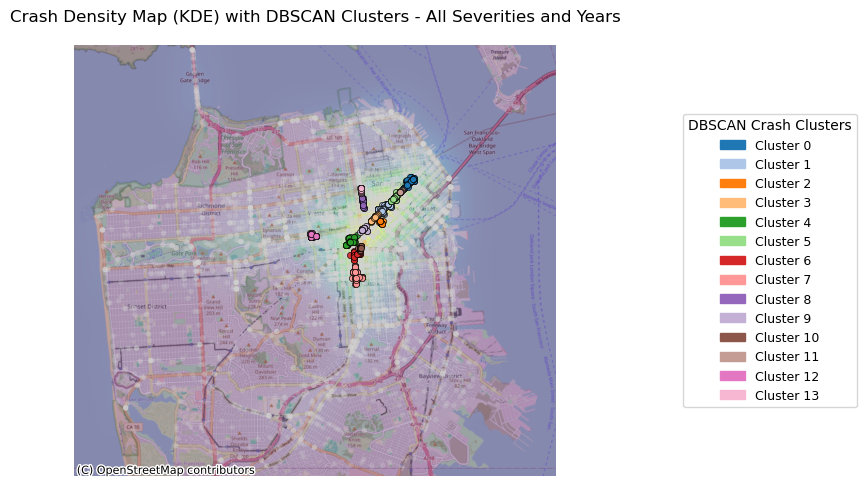

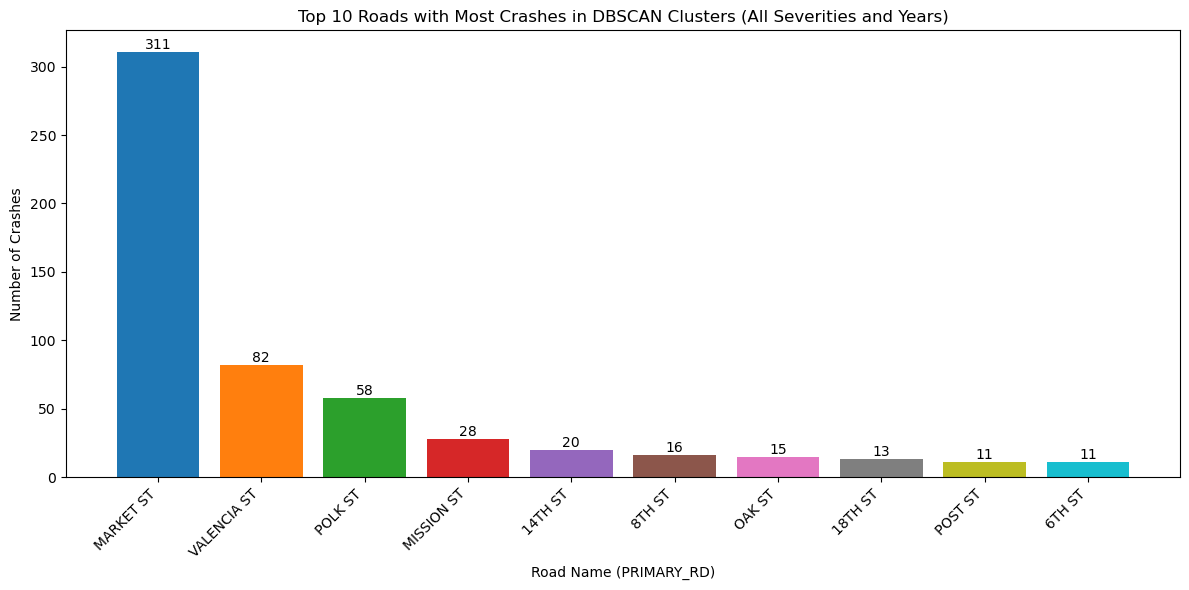

In [4]:
from tools.KDE import plot_crash_clusters, plot_top_roads_bar

crashes_clustered = plot_crash_clusters(crashes_clean, severity=None, year=None, eps_meters=100, min_samples=25,
                        title_suffix="All Severities and Years")
plot_top_roads_bar(crashes_clustered, top_n=10, severity=None, year=None, title_suffix="All Severities and Years")

The figure above illustrates all bicycle crashes available in the TIMS data set that occured between 2014 and 2024. The first map shows that the highest density of crashes has occured in the downtown area of SF and the following bar graph indicates that there have been many crashes specifically on Market Street, which is corroborated by the map.

Now, lets break down these crashes by severity. Where do the most severe crashes occur? Is there another trend we can find?

/home/jovyan/final-group07/tools/KDE.py:101: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf_noise.plot(ax=ax, color='lightgrey', markersize=15, alpha=0.25, edgecolor='none')


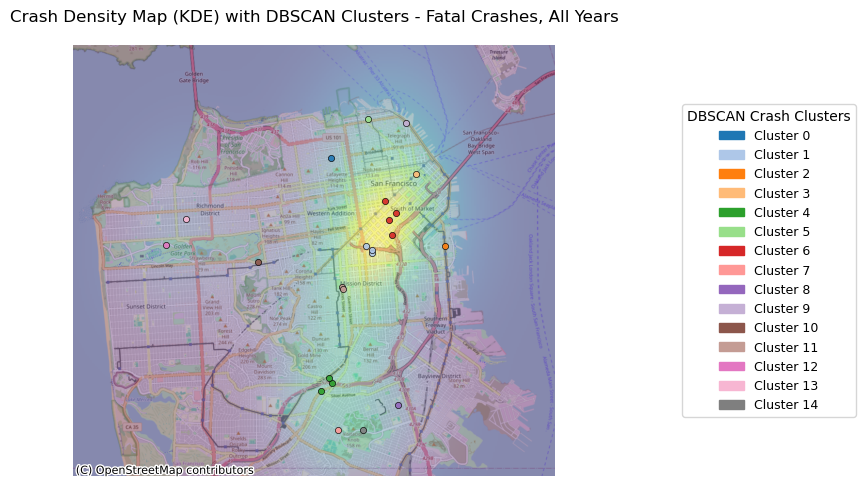

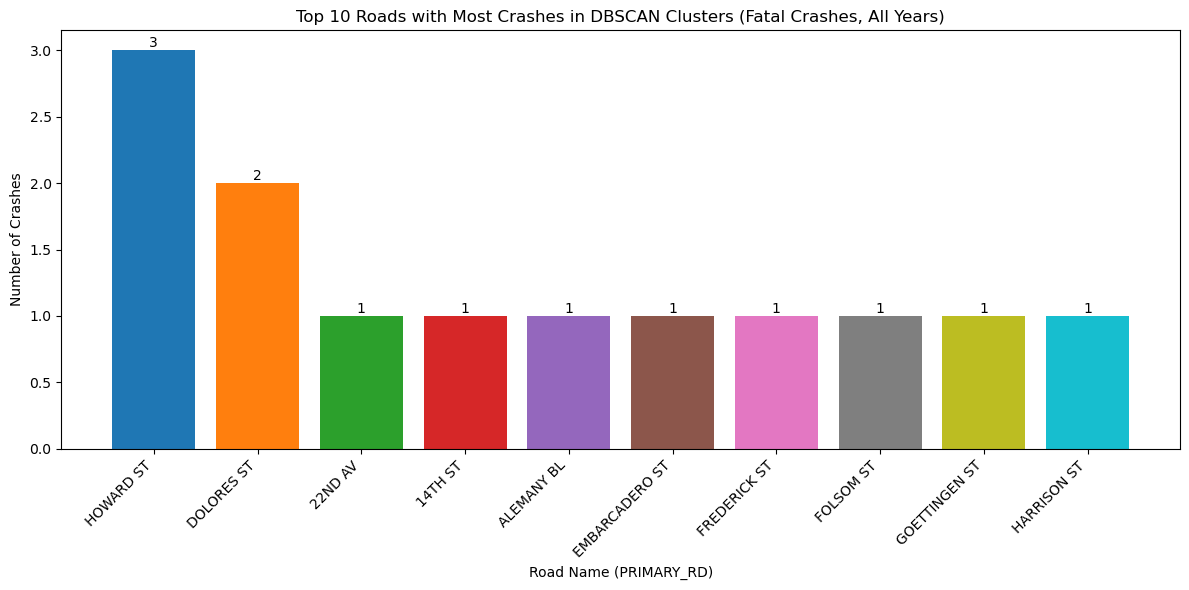

In [30]:
fatal_crashes_clustered = plot_crash_clusters(crashes_clean, severity=1, year=None, eps_meters=500, min_samples=1,
                        title_suffix="Fatal Crashes, All Years")
plot_top_roads_bar(fatal_crashes_clustered, top_n=10, severity=None, year=None, title_suffix="Fatal Crashes, All Years")

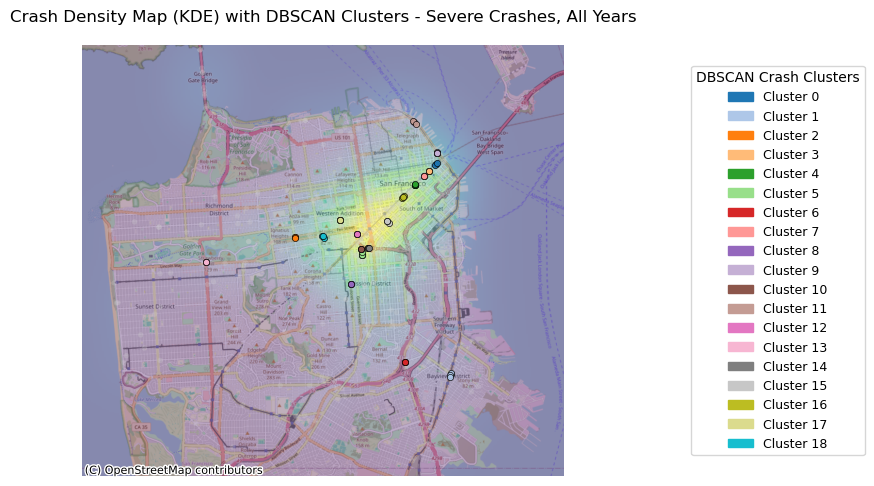

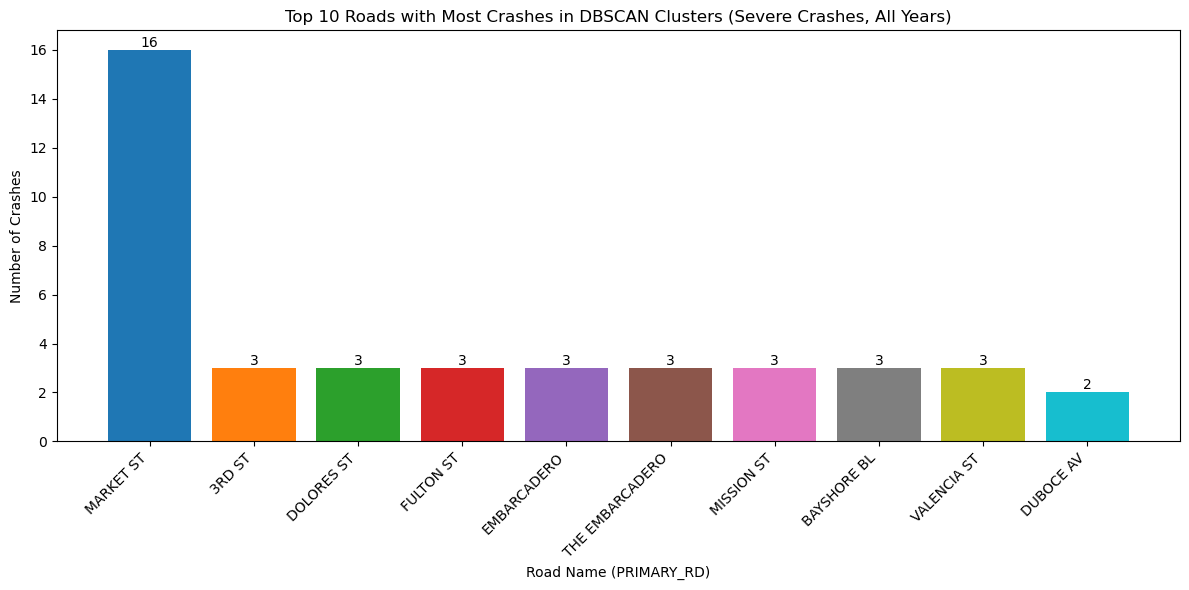

In [6]:
severe_crashes_clustered = plot_crash_clusters(crashes_clean, severity=2, year=None, eps_meters=75, min_samples=3,
                        title_suffix="Severe Crashes, All Years")
plot_top_roads_bar(severe_crashes_clustered, top_n=10, severity=None, year=None, title_suffix="Severe Crashes, All Years")

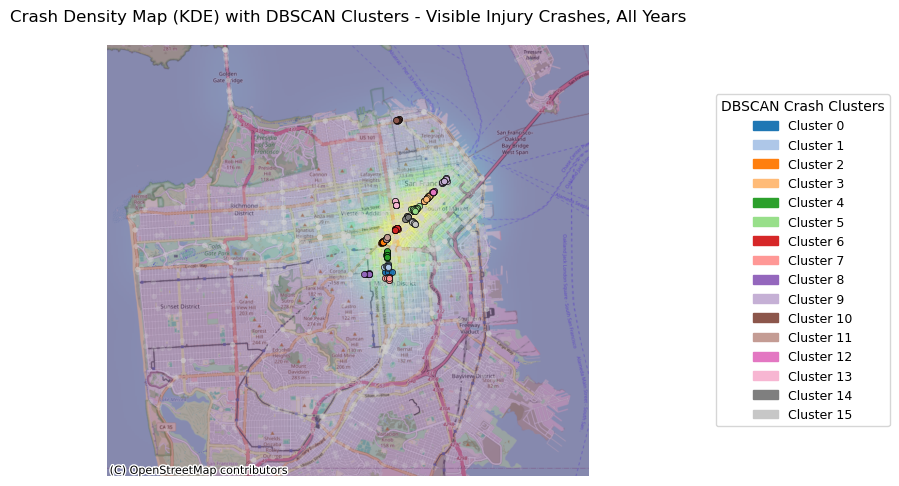

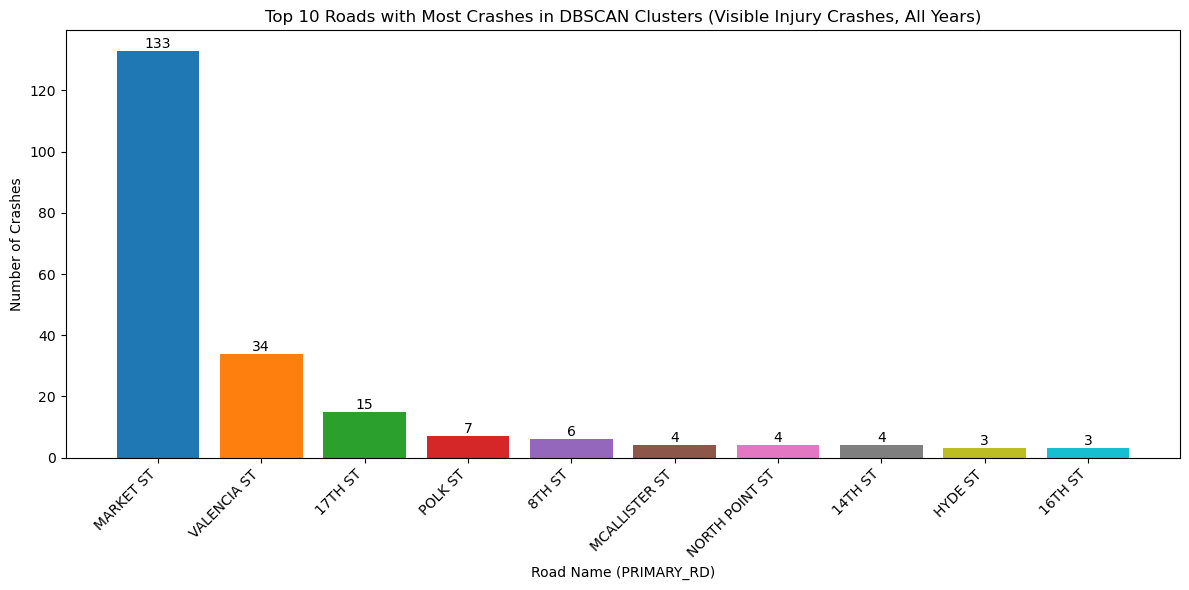

In [7]:
injury_crashes_clustered = plot_crash_clusters(crashes_clean, severity=3, year=None, eps_meters=75, min_samples=10,
                        title_suffix="Visible Injury Crashes, All Years")
plot_top_roads_bar(injury_crashes_clustered, top_n=10, severity=None, year=None, title_suffix="Visible Injury Crashes, All Years")

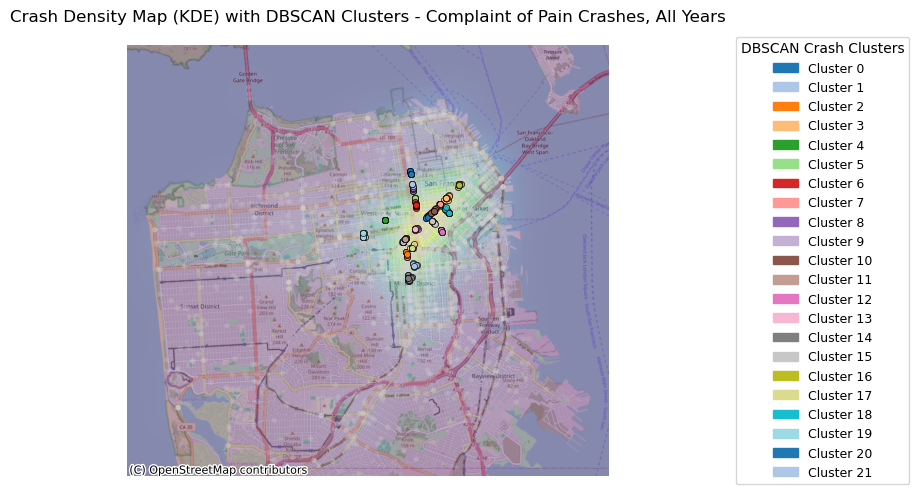

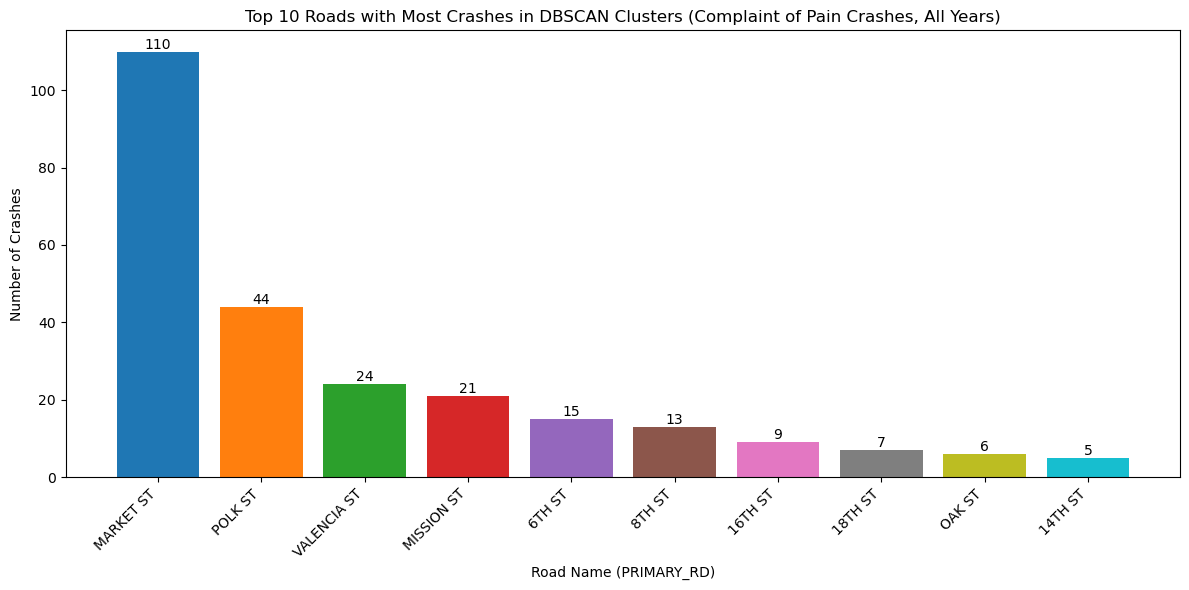

In [28]:
cop_crashes_clustered = plot_crash_clusters(crashes_clean, severity=4, year=None, eps_meters=75, min_samples= 10,
                        title_suffix="Complaint of Pain Crashes, All Years")
plot_top_roads_bar(cop_crashes_clustered, top_n=10, severity=None, year=None, title_suffix="Complaint of Pain Crashes, All Years")

## Trends Around Market Street
The above graphs confirm a startling number of crashes densly clustered on Market Street. However, on January 29, 2020, Market Street was closed to motor vehicles, outside of emergency services and buses. This means that interactions between cars and bikes were almost zero, except for traffic crossing the street perpendicularly.  When we filter out crashes that occured after that date, we see the following.

In [9]:
# Turn to datetime format
crashes_clean['COLLISION_DATE'] = pd.to_datetime(
    crashes_clean['COLLISION_DATE'],
    errors='coerce'
)

# Filter crashes after 2020-01-29
crashes_recent = crashes_clean[
    crashes_clean['COLLISION_DATE'] > pd.Timestamp('2020-01-29')
]

/home/jovyan/final-group07/tools/KDE.py:101: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf_noise.plot(ax=ax, color='lightgrey', markersize=15, alpha=0.25, edgecolor='none')


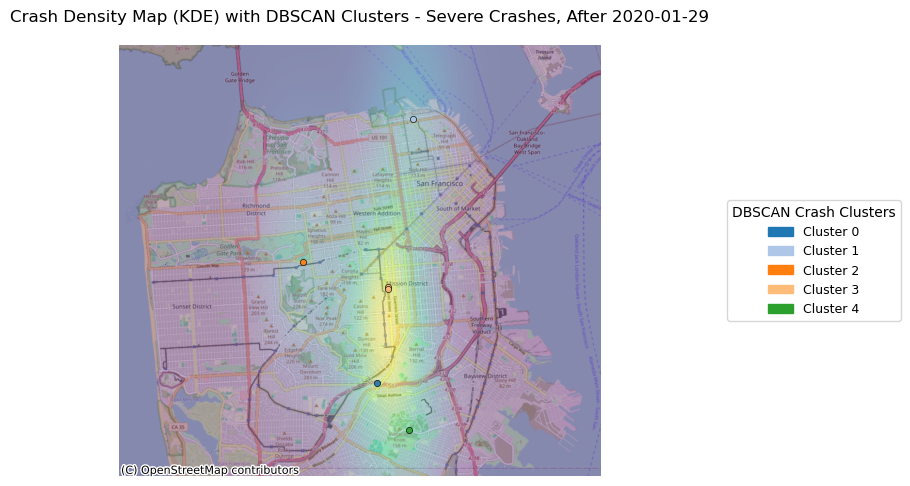

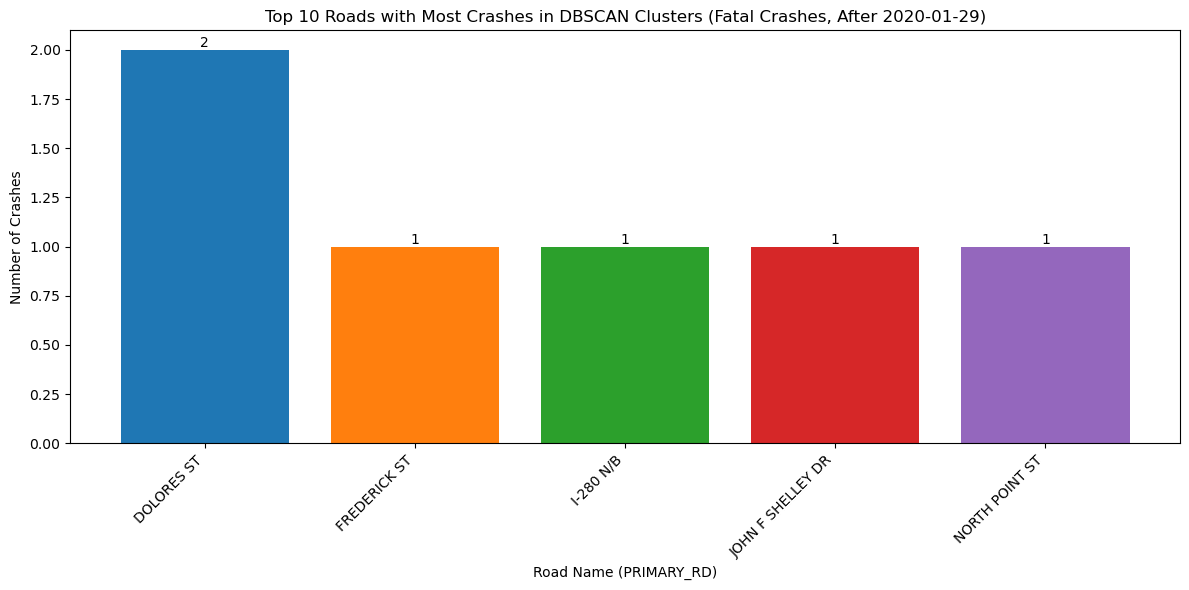

In [29]:
fatal_recent_clustered = plot_crash_clusters(crashes_recent, severity=1, year=None, eps_meters=500, min_samples= 1,
                        title_suffix="Severe Crashes, After 2020-01-29")
plot_top_roads_bar(fatal_recent_clustered, top_n=10, severity=None, year=None, title_suffix="Fatal Crashes, After 2020-01-29")


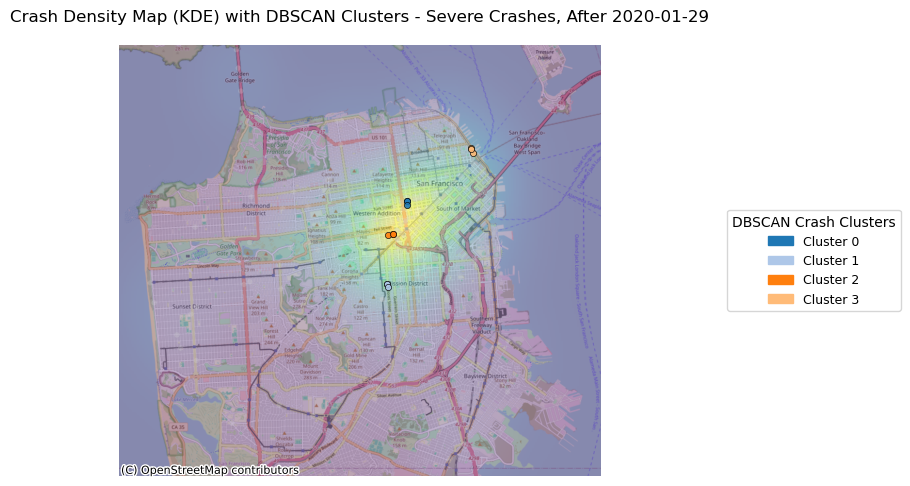

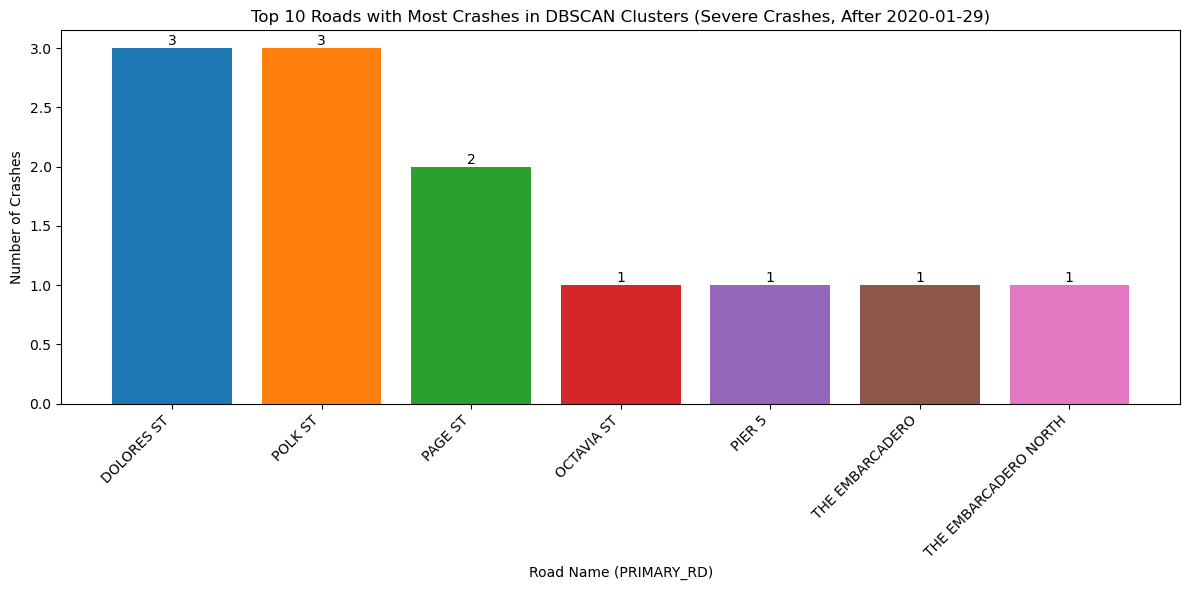

In [18]:
severe_recent_clustered = plot_crash_clusters(crashes_recent, severity=2, year=None, eps_meters=150, min_samples= 3,
                        title_suffix="Severe Crashes, After 2020-01-29")
plot_top_roads_bar(severe_recent_clustered, top_n=10, severity=None, year=None, title_suffix="Severe Crashes, After 2020-01-29")


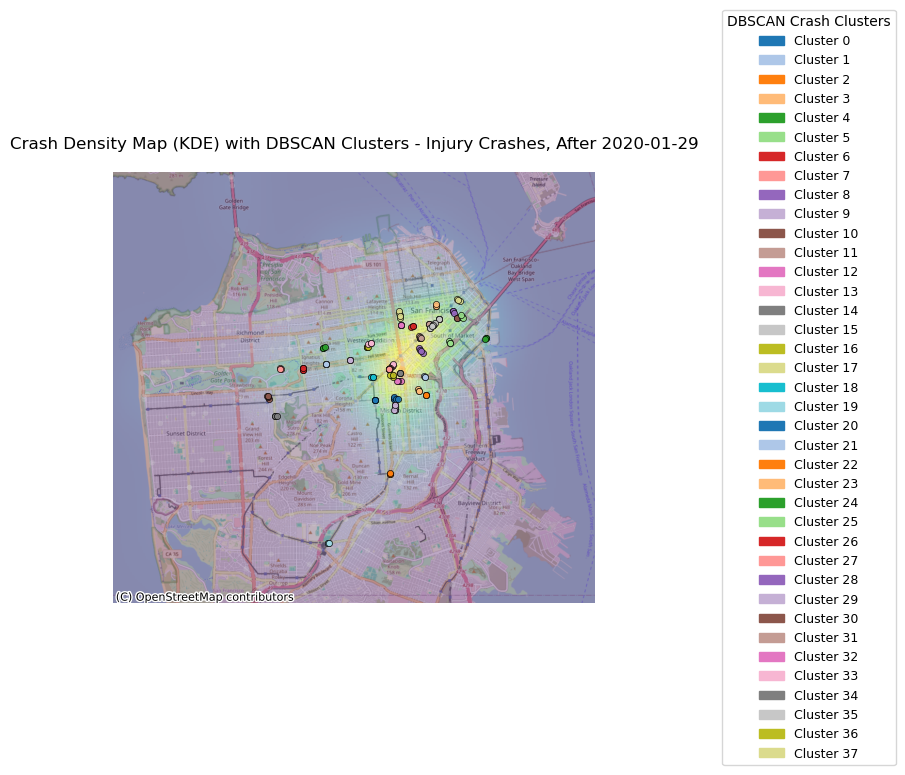

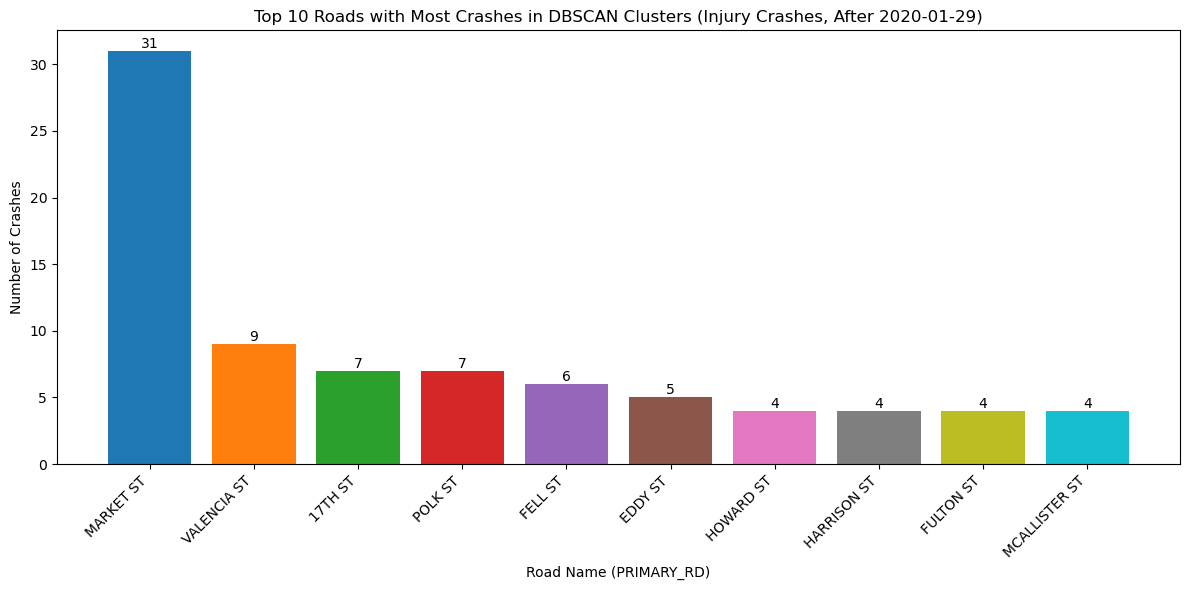

In [21]:
injury_recent_clustered = plot_crash_clusters(crashes_recent, severity=3, year=None, eps_meters=75, min_samples= 3,
                        title_suffix="Injury Crashes, After 2020-01-29")
plot_top_roads_bar(injury_recent_clustered, top_n=10, severity=None, year=None, title_suffix="Injury Crashes, After 2020-01-29")


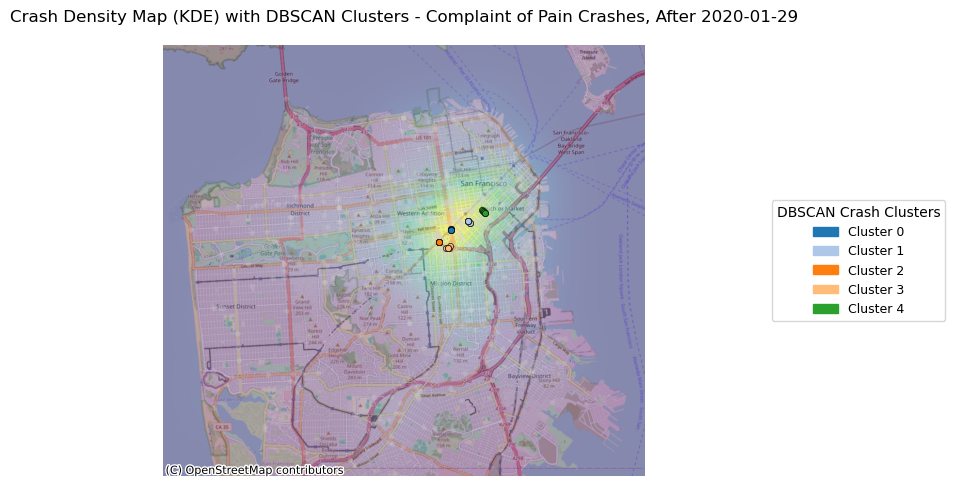

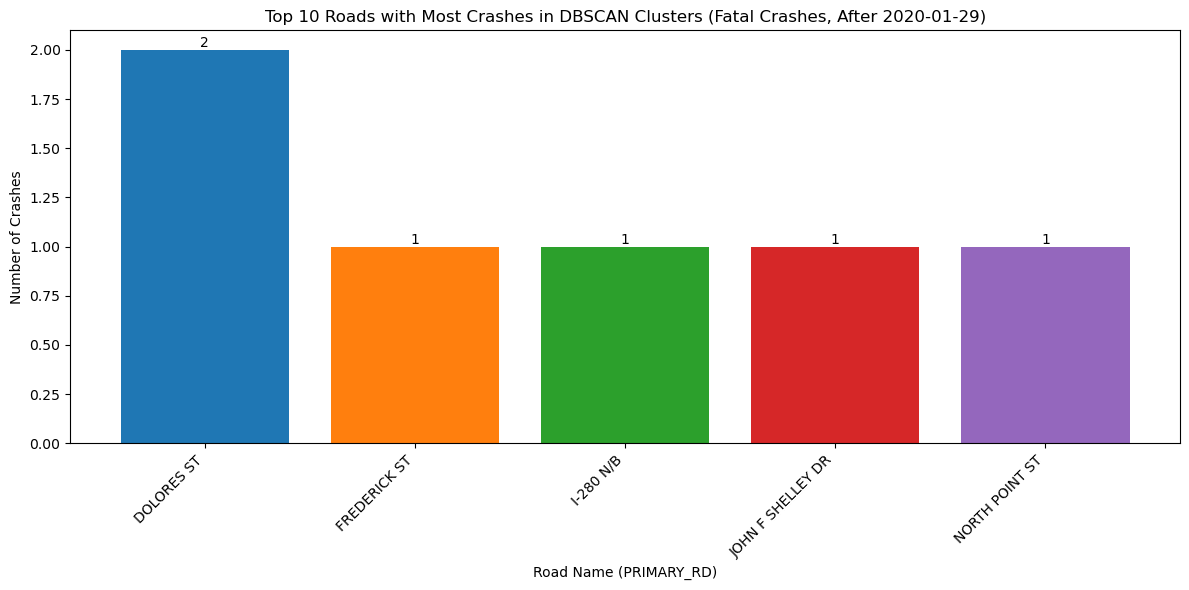

In [26]:
cop_recent_clustered = plot_crash_clusters(crashes_recent, severity=4, year=None, eps_meters=75, min_samples= 5,
                        title_suffix="Complaint of Pain Crashes, After 2020-01-29")
plot_top_roads_bar(fatal_recent_clustered, top_n=10, severity=None, year=None, title_suffix="Fatal Crashes, After 2020-01-29")


With the change in vehicle allowance on Market Street, it is not surprising that Market Street no longer consistently comes up as a road with an exorbinant amount of crashes. Interestingly, it still appears to have many clustered crashes resulting in visible injuries. However, more consistently, we see roads such as Dolores Street, Frederick Street, and Polk Street